Simple  Linear regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

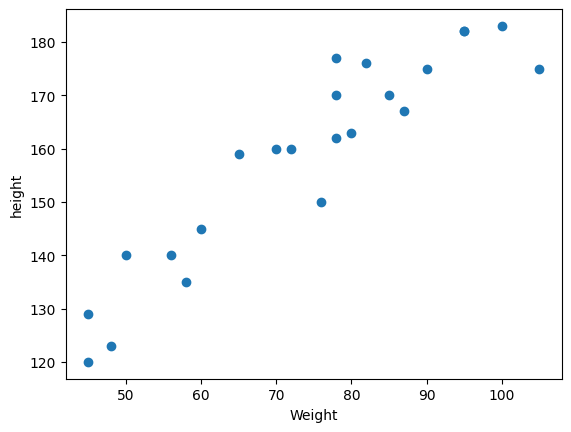

In [7]:

# scatter the plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')

In [ ]:
# correlation finding
df.corr()
# Correlation coefficients range between -1 and 1:
# 1: Perfect positive correlation (as one variable increases, the other also increases proportionally).
# -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).
# 0: No linear relationship between variables.

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [11]:
!pip install seaborn

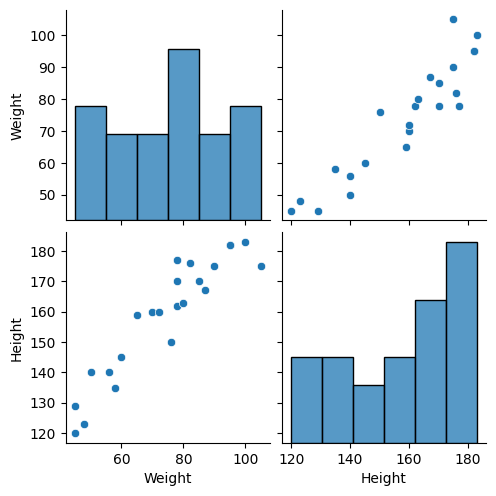

In [13]:
import seaborn as sns
sns.pairplot(df)

In [26]:
# independent features and dependent features
X=df[['Weight']]  # indepenedent feature must be in dataframe or in 2-dimensional array
print(type(X))
np.array(X).shape

y=df['Height'] # this can be in 1-d array or in series form


<class 'pandas.core.frame.DataFrame'>


In [24]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [25]:
x_series=df['Weight']
print(type(x_series))
np.array(x_series).shape

<class 'pandas.core.series.Series'>


(23,)

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42) #use of random state is for every one who all are put same random state they will get same value means picking up the value will be the same for them


In [28]:
# standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_trian=scaler.fit_transform(X_trian) # mean =0 and standdarization =1 it will become

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [30]:
X_test=scaler.transform(X_test) # why here only transform beacuse we dont want to data leakgae model is fit in train only we can transform no need to fit and we dont want to leakage the dataa from train

In [31]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [33]:
# simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_trian,y_train)

LinearRegression()

In [35]:
# intercept and coefficient
print("intercept:",regression.intercept_)
print("coeffienct:",regression.coef_)

intercept: 80.52684512622542
coeffienct: [1.04792503]


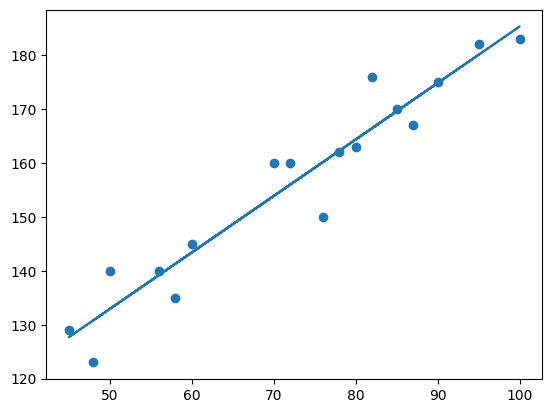

In [42]:
# ploting best fit line for predicting training data
plt.scatter(X_trian,y_train)
plt.plot(X_trian,regression.predict(X_trian))

In [43]:
# predicting the for the test data
y_pred=regression.predict(X_test)

c:\Users\shara\Desktop\ALL FILES\machine learning\Python\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

82.97662409755102
7276.932884039703
85.3049405605543


In [ ]:
# r squared 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-15.723241865651406


In [49]:
# adujust r square
ad_score=1-(1-score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)
print(ad_score)

-19.904052332064257


In [51]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 342.2 kB/s eta 0:00:28
   -- ------------------------------------- 0.5/9.8 MB 342.2 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9.8 MB 466.0 kB/s eta 0:00:20
   ---- ----------------------------------- 1.0/9.8 MB 565.4 kB/s eta 0:00:1

In [52]:
# OLS linear regression
import statsmodels.api as sm

model=sm.OLS(y_train,X_trian).fit()

pred=model.predict(X_test)
print(pred)

[ 0.70487577  0.70487577 -3.5018828   2.87199382 -0.95233215  4.14676914]


In [54]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                    2.80e-16
Time:                        11:38:10   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\shara\Desktop\ALL FILES\machine learning\Python\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [55]:
regression.predict([[51]])

c:\Users\shara\Desktop\ALL FILES\machine learning\Python\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133.97102149])

In [ ]:
regression.predict(scaler.transform([[72]])) # remember whenever you are going to predit for the new value then shoudl use scaler.transform

c:\Users\shara\Desktop\ALL FILES\machine learning\Python\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shara\Desktop\ALL FILES\machine learning\Python\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.49697064])